# Homework 2
## Bradly T Booth
## 919346279
### 20220502
For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__.

## About the Data Set
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras
- Any other library used during the lectures and discussion sessions.

### Other Notes
- Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment.
- Discussion materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.



## Exercise 1 : Building a Feed-Forward Neural Network(50 points)

### Exercise 1.1 : Data Preprocessing (10 points)

- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Normalize each field of the input data using the min-max normalization technique.

### Exercise 1.2 : Training and Testing the Neural Network (40 points)

Design a 4-layer artificial neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a multi-class classification problem so select the right number of nodes accordingly for the output layer.

For training and testing the model, split the data into training and testing set by __90:10__ and use the training set for training the model and the test set to evaluate the model performance.

Consider the following hyperparameters while developing your model :

- Number of nodes in each hidden layer should be (12, 3)
- Learning rate should be 0.3
- Number of epochs should be 500
- The sigmoid function should be used as the activation function in each layer
- Stochastic Gradient Descent should be used to minimize the error rate

__Requirements once the model has been trained :__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- The accuracy and mean squared error (MSE) of the model
- The precision and recall for each label in the class

__Notes :__

- Splitting of the dataset should be done __after__ the data preprocessing step.
- The mean squared error (MSE) values obtained __should be positive__.


# Exercise 1.1

In [2]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#Yay, we did it!!! We started the project...nothing can stop us now!!  Except numpy arrays.  Fuck that!!!!!!!!


df = pd.read_csv('./Dry_Beans_Dataset.csv')

yTemp = df['Class']
x = df.drop('Class', axis=1)

x = ((x - x.min().min())/(x.max().max()-x.min().min()))  #Normallizing the data

#Decided to implement my own 1 hot encoding scheme
data = {
    'SIRA':[0,0,0,0,0,0,1],
    'DERMANSON':[0,0,0,0,0,1,0],
    'BOMBAY':[0,0,0,0,1,0,0],
    'BARBUNYA':[0,0,0,1,0,0,0],
    'HOROZ':[0,0,1,0,0,0,0],
    'SEKER':[0,1,0,0,0,0,0],
    'CALI':[1,0,0,0,0,0,0]
}
dataE = {
    'SIRA':[],
    'DERMANSON':[],
    'BOMBAY':[],
    'BARBUNYA':[],
    'HOROZ':[],
    'SEKER':[],
    'CALI':[]
}
temp = pd.DataFrame(data)
y = pd.DataFrame(dataE)

for i in yTemp:
    if(i == 'SIRA'):
        y = pd.concat([y, temp.iloc[[6], :]])
    elif(i == 'DERMASON'):
        y = pd.concat([y, temp.iloc[[5], :]])
    elif(i == 'BOMBAY'):
        y = pd.concat([y, temp.iloc[[4], :]])
    elif(i == 'BARBUNYA'):
        y = pd.concat([y, temp.iloc[[3], :]])
    elif(i == 'HOROZ'):
        y = pd.concat([y, temp.iloc[[2], :]])
    elif(i == 'SEKER'):
        y = pd.concat([y, temp.iloc[[1], :]])
    elif(i == 'CALI'):
        y = pd.concat([y, temp.iloc[[0], :]])
y = y.reset_index()
y = y.drop('index', axis=1)
print(y)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20, random_state=5)
print("")
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

       SIRA  DERMANSON  BOMBAY  BARBUNYA  HOROZ  SEKER  CALI
0       1.0        0.0     0.0       0.0    0.0    0.0   0.0
1       0.0        1.0     0.0       0.0    0.0    0.0   0.0
2       0.0        1.0     0.0       0.0    0.0    0.0   0.0
3       1.0        0.0     0.0       0.0    0.0    0.0   0.0
4       0.0        1.0     0.0       0.0    0.0    0.0   0.0
...     ...        ...     ...       ...    ...    ...   ...
13606   0.0        1.0     0.0       0.0    0.0    0.0   0.0
13607   0.0        0.0     1.0       0.0    0.0    0.0   0.0
13608   1.0        0.0     0.0       0.0    0.0    0.0   0.0
13609   0.0        0.0     0.0       0.0    1.0    0.0   0.0
13610   1.0        0.0     0.0       0.0    0.0    0.0   0.0

[13611 rows x 7 columns]

(10888, 16) (10888, 7)
(2723, 16) (2723, 7)


# Exercise 1.2

In [4]:
import math

x = xTrain.to_numpy()
yT = yTrain.to_numpy()

layer1 = np.random.rand(12,16)
z1 = np.ones((12,1))
layer1Out = np.ones((12,1))

layer2 = np.random.rand(3,12)
z2 = np.ones((3,1))
layer2Out = np.ones((3,1))

layer3 = np.random.rand(7,3)
z3 = np.ones((7,1))
output = np.ones((7,1))

for m in range(500):
    for n in range(x.shape[0]):
        #Forward feed layer 1
        for i in range(12):
            z1[i] = np.dot(x[n,:], layer1[i,:]) 
            layer1Out[i] = 1/(1+ math.exp(z1[i]))
        
        #Forward feed layer 2
        for i in range(3):
            z2[i] = np.dot(layer1Out.transpose(), layer2[i,:]) 
            layer2Out[i] = 1/(1+ math.exp(z2[i]))
        
        #Forward feed output layer
        for i in range(7):
            z3[i] = np.dot(layer2Out.transpose(), layer3[i,:]) 
            output[i] = 1/(1+ math.exp(z3[i]))

        #Back propagation, output to layer 2
        for i in range(3):
            for j in range(7):
                yTemp = yT[n, :]
                layer3[j,i] = layer3[j,i] + .3*output[j]*(1-output[j])*(yTemp[j] - output[j])*layer2Out[i]
        
        #Back propagation, layer 2 to layer 1
        for i in range(12):
            for j in range(3):
                layer2[j,i] = layer2[j,i] + .3*layer2Out[j]*(1-layer2Out[j])*z2[j]*layer1Out[i]

        #Back propagation, layer 1 to input weights
        for i in range(16):
            for j in range(12):
                xTemp = x[n, :]
                layer1[j,i] = layer1[j,i] + .3*layer1Out[j]*(1-layer1Out[j])*z1[j]*xTemp[i]


In [5]:
print(layer1)

[[5.18307403e+01 1.65539395e+00 1.33217486e+00 8.11514097e-01
  1.28057659e-01 4.09213459e-02 5.25605018e+01 8.08840395e-01
  3.11445694e-01 8.47016657e-01 7.76634207e-01 3.07693244e-01
  9.84577577e-01 5.68032187e-01 8.64025360e-01 3.87398350e-01]
 [5.20707505e+01 1.74406037e+00 6.06594805e-01 2.78319623e-01
  2.19269869e-01 1.64903722e-01 5.23283060e+01 1.13949692e+00
  6.46582117e-02 3.19943743e-01 3.78352916e-01 8.34565474e-03
  8.49150178e-01 1.95223965e-01 9.50733875e-01 4.70575890e-01]
 [5.17927405e+01 1.52311937e+00 1.36908531e+00 7.31153994e-01
  8.38890251e-01 2.80864949e-01 5.26019874e+01 6.97963214e-01
  1.51888933e-01 9.22852965e-01 7.64072833e-01 5.82533795e-01
  6.20711303e-01 1.82480706e-01 8.60824240e-01 5.46943720e-01]
 [5.22174604e+01 1.55630092e+00 4.16342695e-01 7.19691837e-01
  1.96348250e-01 6.97475346e-01 5.21918514e+01 3.60656241e-01
  6.03951118e-01 7.06620824e-01 4.65066842e-01 8.30840579e-01
  1.43163270e-01 4.76256139e-01 1.96012894e-01 1.68452269e-01]
 [5.

So theoretically, I should be able to feed data points through the layers above.  This would be the prediction.  Then I cross check that with the output?  I don't think I will do that. I wrote the above as an exercise for myself to try to understand better what I am accomplishing.  It took a couple of hours to run.  Below is my neural net using tensorflow.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 

model = Sequential(name = 'classifier') #classifier doesn't do anything(I think)...just the name of the model

layers = [
    Dense(12, activation='sigmoid', name ="layer1"),
    Dense(3, activation='sigmoid', name ="layer2"),
    Dense(7, activation='sigmoid')
]

#Add each layer to the model
for layer in layers:
    model.add(layer)
    
model.compile(optimizer=SGD(learning_rate=0.3), loss='mse', metrics=['accuracy'])

hist = model.fit(x, y, validation_split=0.2, epochs=500, verbose=0) 
#Why did we split the model into training and testing data, only to not use it here.

In [7]:
pred_train= model.predict(xTrain)
score, acc = model.evaluate(xTrain, yTrain, verbose=0)
print('Training Error: %.3f' % score)
print('Training Accuracy: %.3f' % acc)

Training Error: 0.078
Training Accuracy: 0.586


In [8]:
pred_train= model.predict(xTest)
score, acc = model.evaluate(xTest, yTest, verbose=0)
print('Test Error: %.3f' % score)
print('Test Accuracy: %.3f' % acc)

Test Error: 0.079
Test Accuracy: 0.569


In [9]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

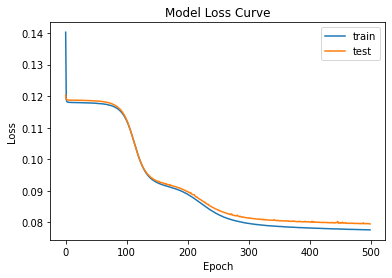

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

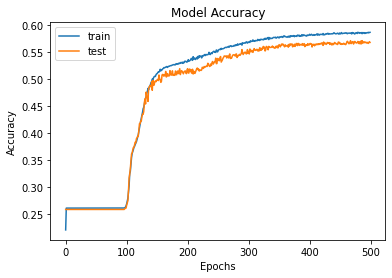

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

I feel like the accuracy is pretty low.  I know we were told not that accuracy is not important but I wonder if it has anything to do with my one hot encoding. Let me try using the actual one hot encoding library. brb

In [12]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('./Dry_Beans_Dataset.csv')

yTemp = df['Class']
x = df.drop('Class', axis=1)

x = ((x - x.min().min())/(x.max().max()-x.min().min()))  #Normallizing the data

print(yTemp)
y = pd.get_dummies(data = yTemp, columns=['class'])
print(y)

0            SIRA
1        DERMASON
2        DERMASON
3            SIRA
4        DERMASON
           ...   
13606    DERMASON
13607      BOMBAY
13608        SIRA
13609       HOROZ
13610        SIRA
Name: Class, Length: 13611, dtype: object
       BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
0             0       0     0         0      0      0     1
1             0       0     0         1      0      0     0
2             0       0     0         1      0      0     0
3             0       0     0         0      0      0     1
4             0       0     0         1      0      0     0
...         ...     ...   ...       ...    ...    ...   ...
13606         0       0     0         1      0      0     0
13607         0       1     0         0      0      0     0
13608         0       0     0         0      0      0     1
13609         0       0     0         0      1      0     0
13610         0       0     0         0      0      0     1

[13611 rows x 7 columns]


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 

model = Sequential(name = 'classifier') #classifier doesn't do anything(I think)...just the name of the model

layers = [
    Dense(12, activation='sigmoid', name ="layer1"),
    Dense(3, activation='sigmoid', name ="layer2"),
    Dense(7, activation='sigmoid')
]

#Add each layer to the model
for layer in layers:
    model.add(layer)
    
model.compile(optimizer=SGD(learning_rate=0.3), loss='mse', metrics=['accuracy'])

hist = model.fit(x, y, validation_split=0.2, epochs=500, verbose=0)

In [14]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20, random_state=5)
print("")
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)


(10888, 16) (10888, 7)
(2723, 16) (2723, 7)


In [15]:
pred_train= model.predict(xTrain)
score, acc = model.evaluate(xTrain, yTrain, verbose=0)
print('Training Error: %.3f' % score)
print('Training Accuracy: %.3f' % acc)

Training Error: 0.071
Training Accuracy: 0.623


In [16]:
pred_train= model.predict(xTest)
score, acc = model.evaluate(xTest, yTest, verbose=0)
print('Test Error: %.3f' % score)
print('Test Accuracy: %.3f' % acc)

Test Error: 0.072
Test Accuracy: 0.612


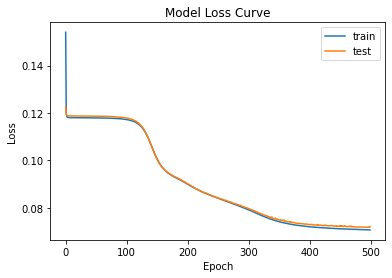

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

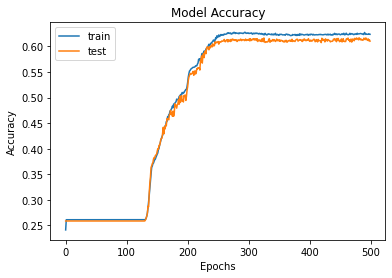

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ok, so accuracy wasn't really affected.  So I have no idea how to improve this, or if it can be improved.  Honestly, not even sure if I have done anything right.  

       BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
2021          0       0     0         1      0      0     0
7444          0       0     0         0      0      0     1
578           0       0     0         0      0      0     1
9324          1       0     0         0      0      0     0
13044         0       0     0         1      0      0     0
...         ...     ...   ...       ...    ...    ...   ...
8075          0       0     0         0      0      0     1
6756          0       0     1         0      0      0     0
2637          1       0     0         0      0      0     0
12997         0       0     0         1      0      0     0
12505         0       0     0         0      1      0     0

[2723 rows x 7 columns]
[[1.4255941e-03 5.2027826e-06 3.6759742e-05 ... 2.9160380e-03
  2.1871877e-01 1.1332947e-01]
 [1.1062264e-02 1.9864769e-05 5.7187676e-04 ... 6.7653209e-02
  2.4265951e-01 3.9743072e-01]
 [1.7793089e-02 2.8263808e-05 1.1095107e-03 ... 1.2852871e-01
  2.437

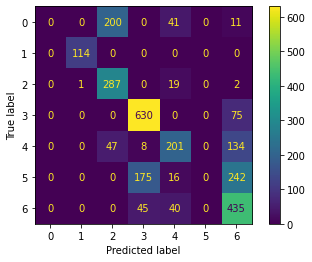

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.math import confusion_matrix
print(yTest)
print(pred_train)

y_test_arg=np.argmax(yTest.to_numpy(), axis=1)
Y_pred = np.argmax(pred_train,axis=1)
soConfused = multilabel_confusion_matrix(y_test_arg, Y_pred)
print(confusion_matrix(y_test_arg, Y_pred))
ConfusionMatrixDisplay.from_predictions(y_test_arg,Y_pred)

#multilabel_confusion_matrix(yTest, pred_train)

## Exercise 2 : k-fold Cross Validation (20 points)

In order to avoid using biased models, use 10-fold cross validation to generalize the model based on the given data set.

__Requirements :__
- The accuracy and MSE values during each iteration of the cross validation
- The overall average accuracy and MSE value

__Note :__ The mean squared error (MSE) values obtained should be positive.

In [20]:
from sklearn.model_selection import KFold

acc_per_fold = []
loss_per_fold = []
fold_num = 1

kfold = KFold(n_splits=10, shuffle=True)

for train, test in kfold.split(x, y):
    # Train on different folds
    #model = create_model()
    hist = model.fit(x.iloc[train], y.iloc[train], epochs=500, verbose=0)
    scores = model.evaluate(x.iloc[test], y.iloc[test], verbose=0)
    print(f'Fold {fold_num} - {model.metrics_names[0]}: {scores[0]}; {model.metrics_names[1]}: {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    # Next fold number
    fold_num = fold_num + 1

Fold 1 - loss: 0.06858130544424057; accuracy: 63.72981071472168%
Fold 2 - loss: 0.06835983693599701; accuracy: 62.89492845535278%
Fold 3 - loss: 0.06909842044115067; accuracy: 61.49889826774597%
Fold 4 - loss: 0.0687844529747963; accuracy: 63.335782289505005%
Fold 5 - loss: 0.06634188443422318; accuracy: 64.29096460342407%
Fold 6 - loss: 0.06818146258592606; accuracy: 62.52755522727966%
Fold 7 - loss: 0.06727416068315506; accuracy: 61.719322204589844%
Fold 8 - loss: 0.06871640682220459; accuracy: 63.7031614780426%
Fold 9 - loss: 0.06633079797029495; accuracy: 64.29096460342407%
Fold 10 - loss: 0.0687650740146637; accuracy: 63.48273158073425%


## Exercise 3 : Hyperparameter Tuning (30 points)

Use either grid search or random search methodology to find the optimal number of nodes required in each hidden layer, as well as the optimal learning rate and the number of epochs, such that the accuracy of the model is maximum for the given data set.

__Requirements :__
- The set of optimal hyperparameters
- The maximum accuracy achieved using this set of optimal hyperparameters

__Note :__ Hyperparameter tuning takes a lot of time to execute. Make sure that you choose the appropriate number of each hyperparameter (preferably 3 of each), and that you allocate enough time to execute your code.

In [21]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam

def createmodel(n_layers, first_layer_nodes, second_layer_nodes, learning_rate=.1):
    model = Sequential()
    
    #n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(2):
        if i==0:
            model.add(Dense(first_layer_nodes, input_dim=16, activation='sigmoid'))
        else:
            model.add(Dense(second_layer_nodes, activation='sigmoid'))
            
    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(7, activation='sigmoid'))
    model.compile(optimizer=SGD(learning_rate=learning_rate), 
                  loss='mse', metrics = ["accuracy"]) #note: metrics could also be 'mse'
    
    return model

param_grid = dict(n_layers=[2], first_layer_nodes = [16, 12, 8], second_layer_nodes=[16,8,3],
                  epochs = [500, 750, 1000], learning_rate= [.15, .3, .45])

model = KerasClassifier(build_fn=createmodel, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x,y)


2022-05-02 19:24:47.235884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 19:24:47.240078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 19:24:47.241962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-02 19:24:47.241986: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries

2022-05-02 19:24:47.479096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 19:24:47.486159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-02 19:24:47.486274: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-02 19:24:47.486562: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

2022-05-02 19:38:16.029836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 19:38:16.035445: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-02 19:38:16.035564: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-02 19:38:16.035808: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

2022-05-02 19:38:41.757860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 19:38:41.764452: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-02 19:38:41.764480: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-02 19:38:41.764733: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

2022-05-02 19:54:29.676101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 19:54:29.685292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-02 19:54:29.685486: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-02 19:54:29.685823: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

2022-05-02 19:55:28.869893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 19:55:28.876654: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-02 19:55:28.876678: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-02 19:55:28.876940: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

2022-05-02 20:06:49.113491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 20:06:49.120371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-05-02 20:06:49.120516: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-02 20:06:49.120795: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [22]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.635442 using {'epochs': 1000, 'first_layer_nodes': 8, 'learning_rate': 0.3, 'n_layers': 2, 'second_layer_nodes': 8}
0.603336 (0.019225) with: {'epochs': 500, 'first_layer_nodes': 16, 'learning_rate': 0.15, 'n_layers': 2, 'second_layer_nodes': 16}
0.566086 (0.018776) with: {'epochs': 500, 'first_layer_nodes': 16, 'learning_rate': 0.15, 'n_layers': 2, 'second_layer_nodes': 8}
0.568217 (0.045830) with: {'epochs': 500, 'first_layer_nodes': 16, 'learning_rate': 0.15, 'n_layers': 2, 'second_layer_nodes': 3}
0.631328 (0.006287) with: {'epochs': 500, 'first_layer_nodes': 16, 'learning_rate': 0.3, 'n_layers': 2, 'second_layer_nodes': 16}
0.628095 (0.004833) with: {'epochs': 500, 'first_layer_nodes': 16, 'learning_rate': 0.3, 'n_layers': 2, 'second_layer_nodes': 8}
0.617148 (0.006276) with: {'epochs': 500, 'first_layer_nodes': 16, 'learning_rate': 0.3, 'n_layers': 2, 'second_layer_nodes': 3}
0.635001 (0.008960) with: {'epochs': 500, 'first_layer_nodes': 16, 'learning_rate': 0.45, 'n_laye